In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [285]:
df = pd.read_csv(r"https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Benefits.csv")
df.head()

,rownames,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,1,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,7,0.290631,yes,yes
1,2,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,10,0.520202,yes,no
2,3,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,10,0.432490,yes,yes
3,4,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,10,0.500000,no,yes
4,5,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,4,0.390625,yes,no


In [287]:
df.shape

(4877, 19)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  4877 non-null   int64  
 1   stateur   4877 non-null   float64
 2   statemb   4877 non-null   int64  
 3   state     4877 non-null   int64  
 4   age       4877 non-null   int64  
 5   tenure    4877 non-null   int64  
 6   joblost   4877 non-null   object 
 7   nwhite    4877 non-null   object 
 8   school12  4877 non-null   object 
 9   sex       4877 non-null   object 
 10  bluecol   4877 non-null   object 
 11  smsa      4877 non-null   object 
 12  married   4877 non-null   object 
 13  dkids     4877 non-null   object 
 14  dykids    4877 non-null   object 
 15  yrdispl   4877 non-null   int64  
 16  rr        4877 non-null   float64
 17  head      4877 non-null   object 
 18  ui        4877 non-null   object 
dtypes: float64(2), int64(6), object(11)
memory usage: 724.1+ KB


In [345]:
df.isna().sum()

rownames    0
stateur     0
statemb     0
state       0
age         0
tenure      0
joblost     0
nwhite      0
school12    0
sex         0
bluecol     0
smsa        0
married     0
dkids       0
dykids      0
yrdispl     0
rr          0
head        0
ui          0
dtype: int64

### Изучая данный датасет хочется ответить на несколько вопросов:
### Как уровень выплаты зависит от причины увольнения сотрудника?
### Зависит ли уровень выплат от  образования работника и причины его увольнения?
### Зависит ли размер выплат от пола работника?
### Зависит ли уровень выплат от количества отработанных лет работником?




### определяю как распределяется количество уволенных по категориям

In [298]:
df['joblost'].unique()

array(['other', 'slack_work', 'position_abolished', 'seasonal_job_ended'],
      dtype=object)

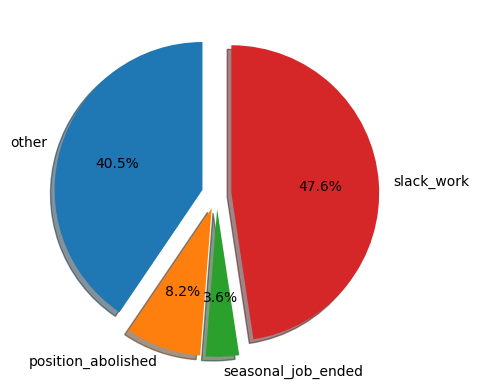

In [300]:
df_pie = df.groupby('joblost').agg({'joblost': 'count'})
df_pie.columns = ['s_count']
df_pie.reset_index
explode = (0.1, 0.1, 0.1, 0.1) 
fig, ax = plt.subplots()
ax.pie(df_pie['s_count'], labels = df_pie.index, explode=explode, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()


по диаграмме видно, что большинство уволенных сотрудников представленных в датасете, находятся в множествах уволенных по "неудовлетворительной работе" и "прочим причинам", а незначительная часть в "по сокращению" и "сезонные работы"

### Как количественно распределялись увольнения по годам от 1982 по 1991

In [304]:
y_dict = {1: 1982, 2: 1983, 3: 1984, 4: 1985, 5: 1986, 6: 1987, 7: 1988, 8: 1989, 9: 1990, 10: 1991}
df['yrdispl'] = df['yrdispl'].map(y_dict)
df.head()

,rownames,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,1,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,1988,0.290631,yes,yes
1,2,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,1991,0.520202,yes,no
2,3,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,1991,0.432490,yes,yes
3,4,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,1991,0.500000,no,yes
4,5,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,1985,0.390625,yes,no


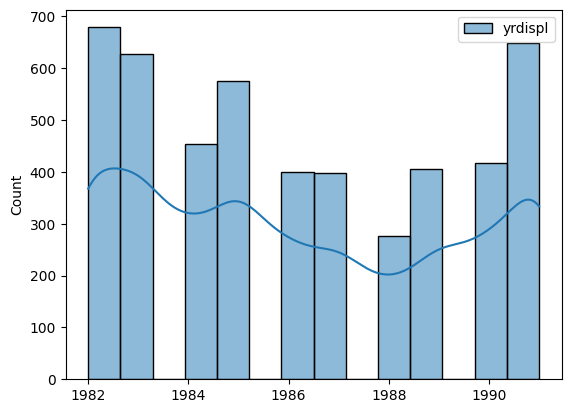

In [308]:
data = pd.DataFrame(df['yrdispl'])
sns.histplot(data, kde = True)
plt.show()

#### по гистограмме заметно, что с 1986 по 1989 наблюдалось некоторое снижение уволенных сотрудников

## Проверю гипотезу, что размеры выплачиваемого пособия тем выше, чем больше лет трудового стажа имеет работник

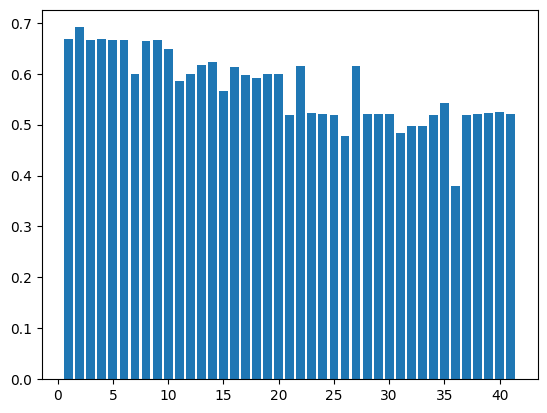

In [58]:
plt.bar(df['tenure'], height = df['rr'])
plt.show()

По диаграмме наблюдается тенденция на снижение объема выплат с увеличением трудового стажа

## Протестируем гипотезу, что уровень пособия по безработице зависит от уровня образования рабочего и причины увольнения, и более квалифицированные сотрудники получают большую поддержку

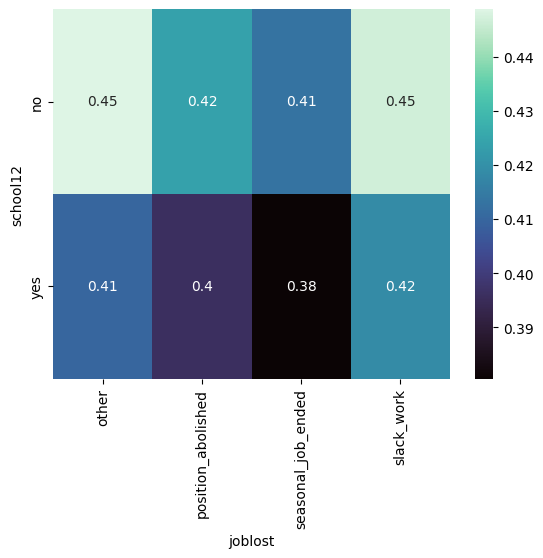

In [338]:
data2 = df.groupby(['school12','joblost'])['rr'].mean().unstack()
data2.head()
sns.heatmap(data2, annot = True, cmap="mako")
plt.show()

По тепловой карте заметно, что средний уровень выплат выше у работников, уволенных за некачественную работу и не имеющих образования выше школьного.


### Оценка соотношения размера выплаты от трудового стажа в разрезе пола работника

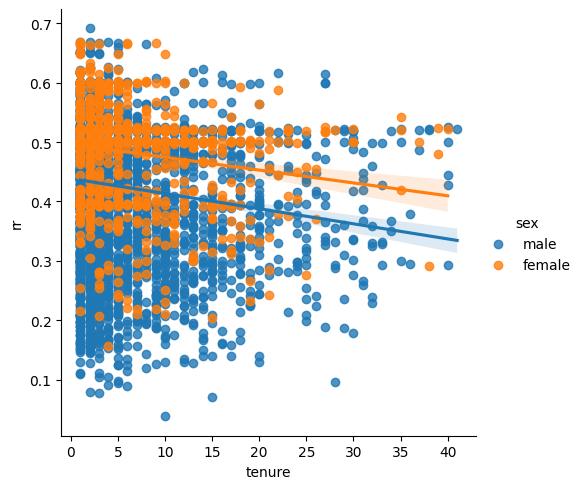

In [349]:
sns.lmplot(data1, x='tenure', y = 'rr', hue = 'sex')
plt.show()

## Протестирую гипотезу, что работники, уволенные по сокращению, получают выплаты выше, чем уволенные за неудовлетворительную работу

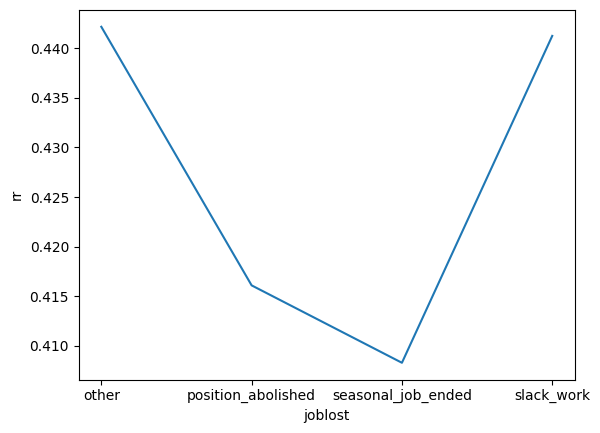

In [324]:
df1 = df.groupby('joblost')['rr'].mean()
sns.lineplot(df1)
plt.show()

По графику заметно, что сотрудники, уволенные по сокращению штата, получают меньшу поддержку, чем сотрудники, уволенные за неудовлетворительную работу

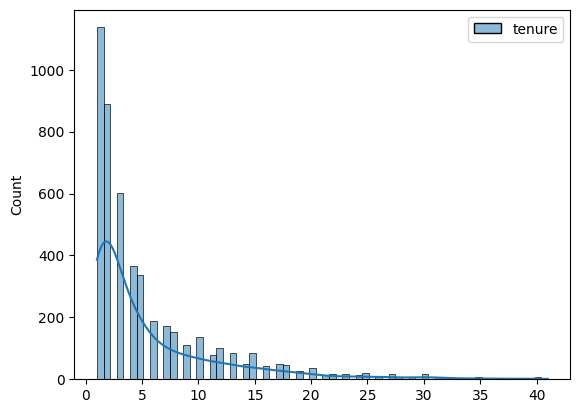

In [317]:
data = pd.DataFrame(df['tenure'])
sns.histplot(data, kde = True)
plt.show()

Распределение уволенных сотрудников по возрастному параметру

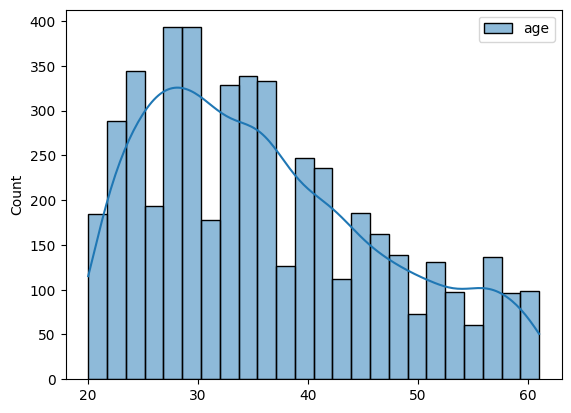

In [93]:
data = pd.DataFrame(df['age'])
sns.histplot(data, kde = True)
plt.show()

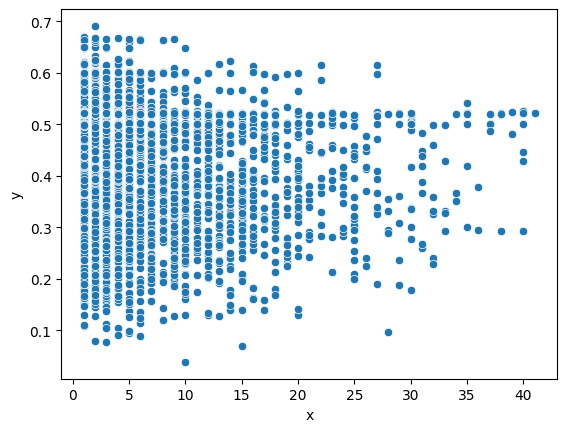

In [32]:
data2 = pd.DataFrame({"x": df['tenure'], "y": df['rr']})
sns.scatterplot(data = data2, x = 'x', y = 'y')
plt.show()